# 1. Feature Engineering-- Handle Missing values Day-5

## Type 5: Arbitary Imputation
tt consists of replacing NaN values with some arbitary values
* These arbitary values can be present at the last of the distribution, may be outlier/leased used in value of the dataset


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Feature_Engineering/Dataset/titanic_train.csv", usecols = ['Age', 'Fare', "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


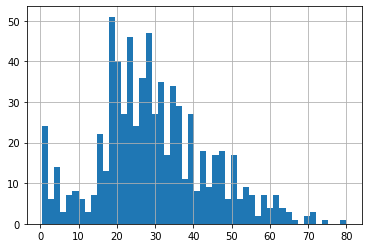

In [6]:
df.Age.hist(bins=50)

In [12]:
def impute_nan(data, feature, median):
    df[feature+'_hundred'] = df[feature].fillna(100)
    df[feature+'_median'] = df[feature].fillna(median)
    df[feature+'_zero'] = df[feature].fillna(0)
#     df[feature].fillna(median, inplace=True)

In [13]:
impute_nan(df, 'Age', df.Age.median())

In [14]:
df.head()

,Survived,Age,Fare,Age_hundred,Age_zero,Age_median
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [15]:
df.isnull().sum()

Survived         0
Age            177
Fare             0
Age_hundred      0
Age_zero         0
Age_median       0
dtype: int64

<IPython.core.display.Javascript object>

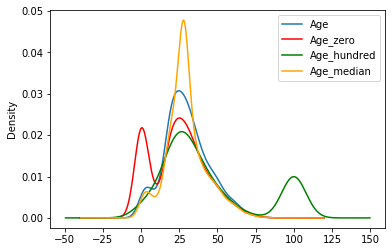

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_zero'].plot(kind = 'kde', ax = ax, color = 'red')
df['Age_hundred'].plot(kind = 'kde', ax = ax, color = 'green')
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### Advantage
- Easy to implement
- Captures the importance of the missing values

### Disavantage
- Distort the original distribution
- hard to choose which value to use